In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('questions.csv')

In [7]:
df.shape

(404351, 6)

In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
new_df = df.sample(30000,random_state=20)

In [13]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
67050,67050,133306,133307,How much black money would be recovered in 201...,How much black money has been recovered after ...,0
156722,156722,309930,309931,Does a magnetic field have mass?,Can we increase the mass of an electron accele...,0
318365,318365,624667,624668,Why has Dhoni left the captaincy from ODI and ...,Why did M.S.Dhoni left captaincy from ODI & T20?,1
225123,225123,443700,443701,Where can I get best assistance in Sydney for ...,Where can I get highest quality service at exc...,1
256584,256584,505029,505030,As a web developer how can I contribute to ope...,How do I contribute on GitHub?,1


In [17]:
new_df.duplicated().sum()

0

is_duplicate
0    18814
1    11186
Name: count, dtype: int64
is_duplicate
0    62.713333
1    37.286667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

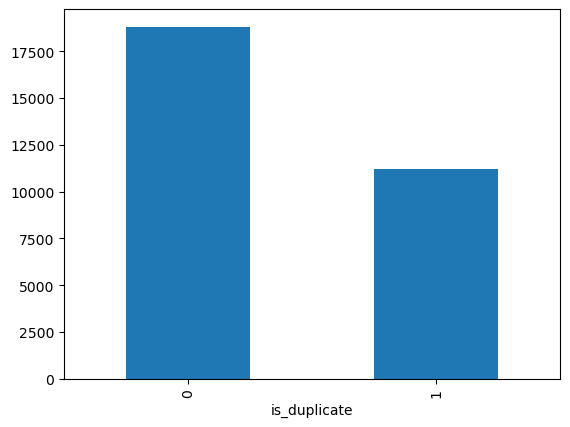

In [19]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [21]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59841
Number of questions getting repeated 150


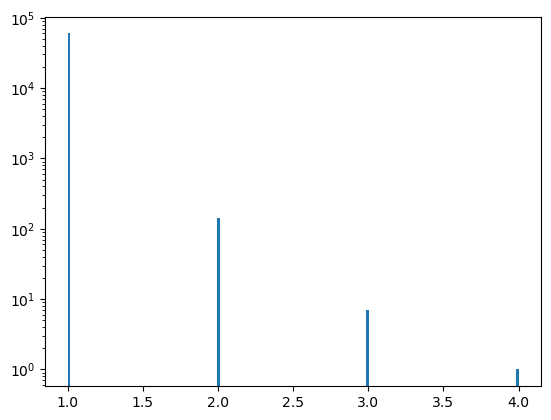

In [23]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [25]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
67050,67050,133306,133307,How much black money would be recovered in 201...,How much black money has been recovered after ...,0,69,101,11,19
156722,156722,309930,309931,Does a magnetic field have mass?,Can we increase the mass of an electron accele...,0,32,120,6,20
318365,318365,624667,624668,Why has Dhoni left the captaincy from ODI and ...,Why did M.S.Dhoni left captaincy from ODI & T20?,1,50,48,10,9
225123,225123,443700,443701,Where can I get best assistance in Sydney for ...,Where can I get highest quality service at exc...,1,70,98,12,15
256584,256584,505029,505030,As a web developer how can I contribute to ope...,How do I contribute on GitHub?,1,65,30,13,6


In [27]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
67050,67050,133306,133307,How much black money would be recovered in 201...,How much black money has been recovered after ...,0,69,101,11,19,6
156722,156722,309930,309931,Does a magnetic field have mass?,Can we increase the mass of an electron accele...,0,32,120,6,20,2
318365,318365,624667,624668,Why has Dhoni left the captaincy from ODI and ...,Why did M.S.Dhoni left captaincy from ODI & T20?,1,50,48,10,9,6
225123,225123,443700,443701,Where can I get best assistance in Sydney for ...,Where can I get highest quality service at exc...,1,70,98,12,15,8
256584,256584,505029,505030,As a web developer how can I contribute to ope...,How do I contribute on GitHub?,1,65,30,13,6,5


In [29]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))


new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
67050,67050,133306,133307,How much black money would be recovered in 201...,How much black money has been recovered after ...,0,69,101,11,19,6,30
156722,156722,309930,309931,Does a magnetic field have mass?,Can we increase the mass of an electron accele...,0,32,120,6,20,2,25
318365,318365,624667,624668,Why has Dhoni left the captaincy from ODI and ...,Why did M.S.Dhoni left captaincy from ODI & T20?,1,50,48,10,9,6,19
225123,225123,443700,443701,Where can I get best assistance in Sydney for ...,Where can I get highest quality service at exc...,1,70,98,12,15,8,27
256584,256584,505029,505030,As a web developer how can I contribute to ope...,How do I contribute on GitHub?,1,65,30,13,6,5,19


In [31]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
67050,67050,133306,133307,How much black money would be recovered in 201...,How much black money has been recovered after ...,0,69,101,11,19,6,30,0.20
156722,156722,309930,309931,Does a magnetic field have mass?,Can we increase the mass of an electron accele...,0,32,120,6,20,2,25,0.08
318365,318365,624667,624668,Why has Dhoni left the captaincy from ODI and ...,Why did M.S.Dhoni left captaincy from ODI & T20?,1,50,48,10,9,6,19,0.32
225123,225123,443700,443701,Where can I get best assistance in Sydney for ...,Where can I get highest quality service at exc...,1,70,98,12,15,8,27,0.30
256584,256584,505029,505030,As a web developer how can I contribute to ope...,How do I contribute on GitHub?,1,65,30,13,6,5,19,0.26


minimum characters 3
maximum characters 315
average num of characters 59


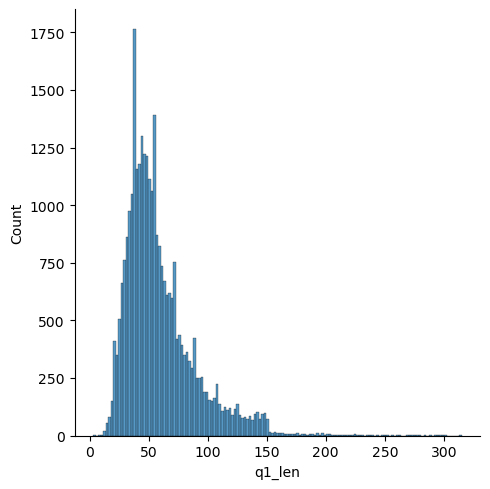

In [33]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 5
maximum characters 1151
average num of characters 60


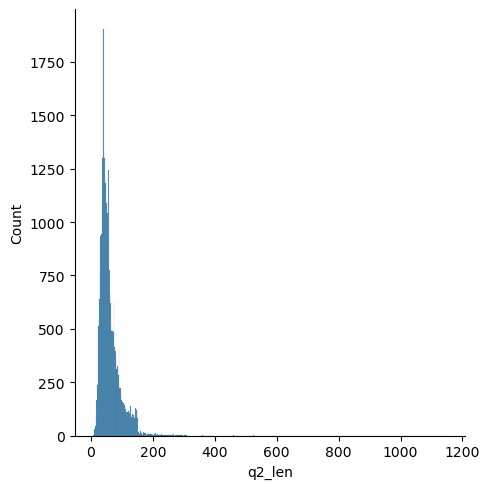

In [35]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 63
average num of words 10


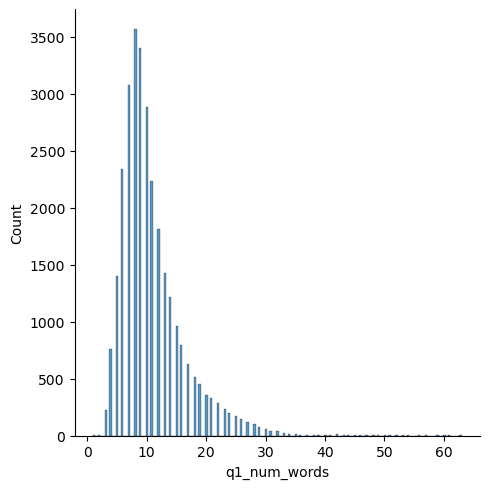

In [37]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


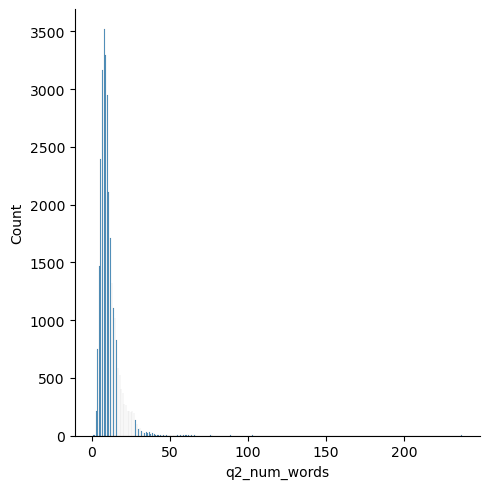

In [39]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

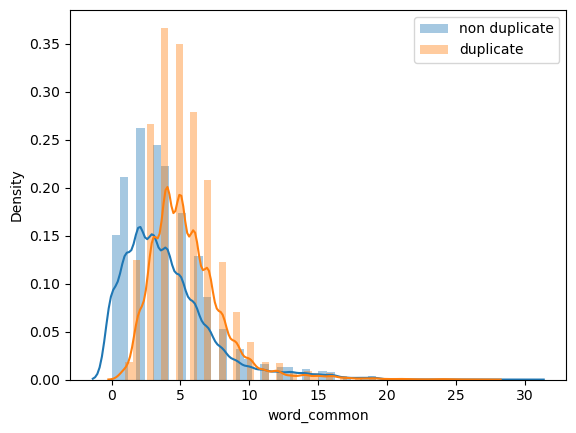

In [41]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

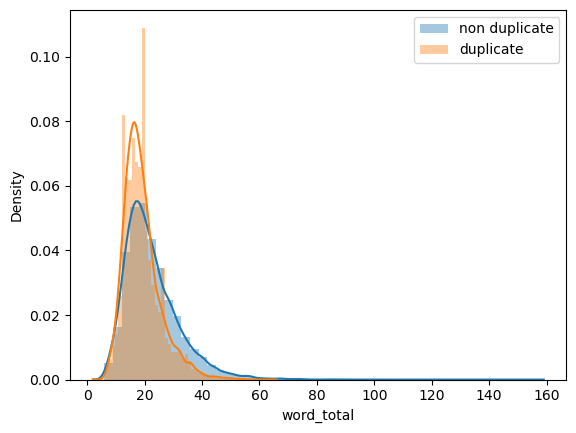

In [43]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

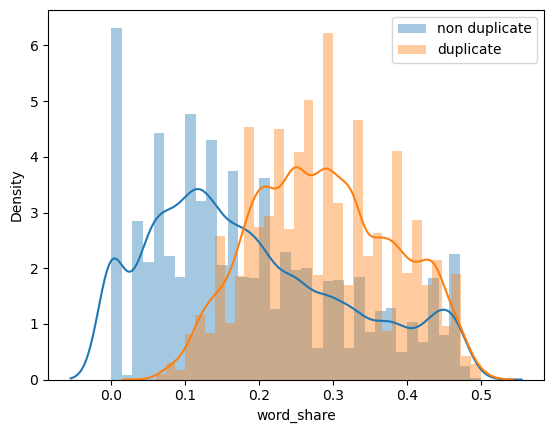

In [45]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [47]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
67050,How much black money would be recovered in 201...,How much black money has been recovered after ...
156722,Does a magnetic field have mass?,Can we increase the mass of an electron accele...
318365,Why has Dhoni left the captaincy from ODI and ...,Why did M.S.Dhoni left captaincy from ODI & T20?
225123,Where can I get best assistance in Sydney for ...,Where can I get highest quality service at exc...
256584,As a web developer how can I contribute to ope...,How do I contribute on GitHub?


In [49]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
67050,0,69,101,11,19,6,30,0.20
156722,0,32,120,6,20,2,25,0.08
318365,1,50,48,10,9,6,19,0.32
225123,1,70,98,12,15,8,27,0.30
256584,1,65,30,13,6,5,19,0.26


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [53]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [55]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
67050,0,69,101,11,19,6,30,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
156722,0,32,120,6,20,2,25,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
318365,1,50,48,10,9,6,19,0.32,0,0,...,0,0,0,0,0,0,0,0,0,0
225123,1,70,98,12,15,8,27,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
256584,1,65,30,13,6,5,19,0.26,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.764

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7683333333333333